In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_lp = np.loadtxt('fort.24.large_pipe')
#y_lp = np.loadtxt('fort.25.large_pipe')

x_sp = np.loadtxt('fort.24.small_pipe')
#y_sp = np.loadtxt('fort.25.small_pipe')

In [3]:
n=np.argwhere(np.isnan(x_lp[:,1]))[0][0]
x_lp[n-1:n+1,1]

array([-0.20725345,         nan])

In [4]:
x_lp = x_lp[:n,:2]
x_sp = x_sp[:n,:2]

In [5]:
x_lp.shape

(1988, 2)

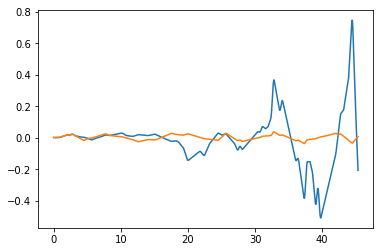

In [6]:
plt.plot(x_lp[:n,0],x_lp[:n,1])
plt.plot(x_sp[:n,0],x_sp[:n,1])

In [7]:
for i in range(n):
    if np.abs(x_lp[i,1]-x_sp[i,1])!=0.0:
        break
nMax = i
print(x_lp[nMax-1,0],x_lp[nMax-1,1]-x_sp[nMax-1,1])
print(x_lp[nMax,0],x_lp[nMax,1]-x_sp[nMax,1])

3.214999999999998 0.0
3.231659961040907 0.00022247944671095407


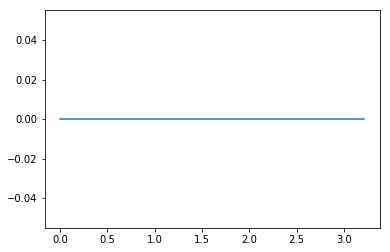

In [8]:
plt.plot(x_lp[:nMax,0],x_lp[:nMax,1]-x_sp[:nMax,1])

In [9]:
import pImpactR as impact

In [10]:
beam,lattice = impact.readInputFile('test.in.small_pipe')

reading ImpactZ input file (test.in.small_pipe)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [11]:
L = 0
for i in range(len(lattice)):
    lattice[i]['s']=L
    if 'length' in lattice[i].keys():
        L = L + lattice[i].length

In [12]:
for i in range(len(lattice)):
    if lattice[i]['s']>4.7980383:
        i5=i
        break

In [13]:
lattice[i5-1]


      length: 0.05 [m]
    n_sckick: 2 [1]
       n_map: 2 [1]
 pipe_radius: 0.15 [m]
        type: 'drift'
           s: 4.7980382858 [m]

In [14]:
lattice[i5]


      length: 0.1275 [m]
    n_sckick: 4 [1]
       n_map: 2 [1]
 pipe_radius: 0.15 [m]
        type: 'drift'
           s: 4.8480382857999995 [m]

In [15]:
i5

24